In [1]:
import pandas as pd
import numpy as np

import pygwalker as pyg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
df_raw=pd.read_csv("C:/Users/Lavoro/Desktop/Portfolio/e-commerce customers segmentation/e-commerce data.csv", encoding='ISO-8859-1')
df=df_raw.copy()

C:\Users\Lavoro\AppData\Local\Temp\ipykernel_4044\1705210341.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw=pd.read_csv("C:/Users/Lavoro/Desktop/Portfolio/e-commerce customers segmentation/e-commerce data.csv", encoding='ISO-8859-1')


In [3]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
381349,570557,22147,FELTCRAFT BUTTERFLY HEARTS,840,10/11/2011 11:15,1.25,16029.0,United Kingdom
456662,576339,35646,VINTAGE BEAD PINK EVENING BAG,2,11/14/2011 15:27,2.46,14096.0,United Kingdom
212551,555938,20728,LUNCH BAG CARS BLUE,10,6/8/2011 9:58,1.65,14257.0,United Kingdom
472462,577503,22742,MAKE YOUR OWN PLAYTIME CARD KIT,2,11/20/2011 12:34,2.95,18110.0,United Kingdom
53275,540968,85066,CREAM SWEETHEART MINI CHEST,2,1/12/2011 13:40,12.75,17338.0,United Kingdom
426895,574262,23330,DECORATIVE WICKER HEART MEDIUM,12,11/3/2011 14:05,1.25,13721.0,United Kingdom
296903,563564,23094,LE GRAND TRAY CHIC SET,1,8/17/2011 14:11,12.50,16633.0,United Kingdom
38667,539653,21484,CHICK GREY HOT WATER BOTTLE,2,12/20/2010 16:50,3.45,13564.0,United Kingdom
504829,579881,85015,SET OF 12 VINTAGE POSTCARD SET,24,11/30/2011 17:22,0.65,12429.0,Denmark
130083,547729,22999,TRAVEL CARD WALLET RETRO PETALS,4,3/25/2011 10:52,0.42,15529.0,United Kingdom


## Exploring and Cleaning Dataset

In [4]:
df.shape

(530104, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530104 entries, 0 to 530103
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530104 non-null  object 
 1   StockCode    530104 non-null  object 
 2   Description  530104 non-null  object 
 3   Quantity     530104 non-null  int64  
 4   InvoiceDate  530104 non-null  object 
 5   UnitPrice    530104 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      530104 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.4+ MB


In [6]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Unique values in column '{col}': {unique_count}")


Unique values in column 'InvoiceNo': 19962
Unique values in column 'StockCode': 3922
Unique values in column 'Description': 4026
Unique values in column 'Quantity': 375
Unique values in column 'InvoiceDate': 18499
Unique values in column 'UnitPrice': 1291
Unique values in column 'CustomerID': 4338
Unique values in column 'Country': 38


In [7]:
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate)

# New column "Total Purchases"
df['Total_Purchases']=df['Quantity'] * df['UnitPrice']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530104 entries, 0 to 530103
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        530104 non-null  object        
 1   StockCode        530104 non-null  object        
 2   Description      530104 non-null  object        
 3   Quantity         530104 non-null  int64         
 4   InvoiceDate      530104 non-null  datetime64[ns]
 5   UnitPrice        530104 non-null  float64       
 6   CustomerID       397884 non-null  float64       
 7   Country          530104 non-null  object        
 8   Total_Purchases  530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 36.4+ MB


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total_Purchases
count,530104.000000,530104.000000,397884.000000,530104.000000
mean,10.542037,3.907625,15294.423453,20.121871
std,155.524124,35.915681,1713.141560,270.356743
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


Gestione dei NaN

In [10]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID         132220
Country                 0
Total_Purchases         0
dtype: int64

In [11]:
df.loc[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Purchases
1430,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1431,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1432,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1433,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
1434,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,14.94
...,...,...,...,...,...,...,...,...,...
529735,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65
529736,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52
529737,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96
529738,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79


Dato che vogliamo segmentare i compratori, non ha senso mantenere i NaN

In [12]:
df=df.dropna()

Duplicated

In [13]:
df.duplicated().sum()

5188

In [14]:
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Purchases
508,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
518,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10
528,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2.95
530,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
546,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2.95
...,...,...,...,...,...,...,...,...,...
529873,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,0.39
529887,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49
529890,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,1.95
529897,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2.10


- Sembra che i duplicati si riferiscano a prodotti diversi acquistati in un' unica transazione con lo stesso InvoiceNo, quindi vanno mantenuti
- Elimino la feature StockCode perchè non interessa per capire e segmentare i clienti
- E' anche utile creare una nuova feature con il tempo trascorso dal primo acquisto, all' ultimo acquisto

In [15]:
# Groupby per controllare se i clienti hanno fatto una singola transazione oppure no
df.groupby(['CustomerID']).agg(Invoice_number_nunique=('InvoiceNo', 'nunique')).reset_index()

,CustomerID,Invoice_number_nunique
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


Dalla groupby si evince che molti clienti hanno fatto acquisti in date differenti, quindi ha senso calcolare il customer lifetime, poichè è una metrica utile per l' analisi che voglio condurre

In [16]:
df['Customer_Life gg'] = df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: (x.max() - x.min()).days)
df['Customer_Life gg'] = df['Customer_Life gg'].replace({0: 1}).fillna(1)
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Purchases,Customer_Life gg
460431,576623,22070,SMALL RED RETROSPOT MUG IN BOX,234,2011-11-15 17:12:00,0.50,12748.0,United Kingdom,117.0,1.0
369001,569562,23434,3 RAFFIA RIBBONS 50'S CHRISTMAS,10,2011-10-05 09:43:00,0.79,12720.0,Germany,7.9,1.0
3248,536618,22555,PLASTERS IN TIN STRONGMAN,24,2010-12-02 10:17:00,1.65,17017.0,United Kingdom,39.6,1.0
272951,561359,20723,STRAWBERRY CHARLOTTE BAG,20,2011-07-26 15:29:00,0.85,17160.0,United Kingdom,17.0,1.0
178443,552624,22488,NATURAL SLATE RECTANGLE CHALKBOARD,2,2011-05-10 12:53:00,1.65,14505.0,United Kingdom,3.3,1.0


In [17]:
df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()

array(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'], dtype=object)

The stock code values aren't only numerical, there are speciales values like D which means Discount or BANK CHARGES or C2, these are specific operations which doesn't characterize our customers so I'll just drop these transactions from our database e dopo droppo l' intera colonna Stock Code, poichè non è utile a descrivere i compratori

In [18]:
df = df[(df['StockCode'] != 'POST') &
        (df['StockCode'] != 'D') &
        (df['StockCode'] != 'C2') &
        (df['StockCode'] != 'M') &
        (df['StockCode'] != 'BANK CHARGES') &
        (df['StockCode'] != 'PADS') &
        (df['StockCode'] != 'DOT')]


In [19]:
df=df.drop('StockCode', axis=1)

In [20]:
new_column_order = ['InvoiceNo', 'InvoiceDate', 'CustomerID','Country', 'Description', 'Quantity', 'UnitPrice', 'Total_Purchases', 'Customer_Life gg']

df = df.reindex(columns=new_column_order)


In [21]:
df

,InvoiceNo,InvoiceDate,CustomerID,Country,Description,Quantity,UnitPrice,Total_Purchases,Customer_Life gg
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,1.0
1,536365,2010-12-01 08:26:00,17850.0,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,1.0
2,536365,2010-12-01 08:26:00,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,1.0
3,536365,2010-12-01 08:26:00,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,1.0
4,536365,2010-12-01 08:26:00,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,1.0
...,...,...,...,...,...,...,...,...,...
530099,581587,2011-12-09 12:50:00,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,1.0
530100,581587,2011-12-09 12:50:00,12680.0,France,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,1.0
530101,581587,2011-12-09 12:50:00,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,1.0
530102,581587,2011-12-09 12:50:00,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,1.0


Outliers

<AxesSubplot: xlabel='Quantity'>

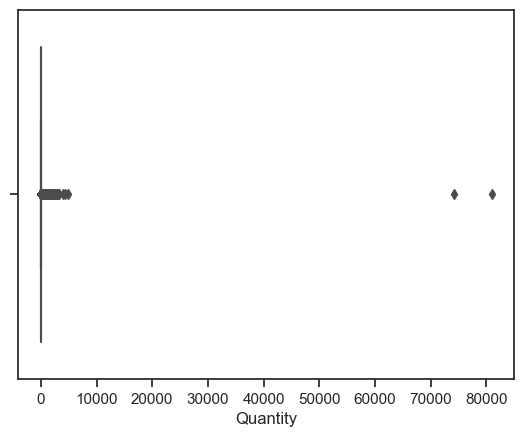

In [22]:
sns.boxplot(x='Quantity', data=df)

In [23]:
outliers=df.loc[(df['Quantity']>4000) | (df['Total_Purchases']>35000)]
outliers

,InvoiceNo,InvoiceDate,CustomerID,Country,Description,Quantity,UnitPrice,Total_Purchases,Customer_Life gg
60250,541431,2011-01-18 10:01:00,12346.0,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,77183.6,1.0
201086,554868,2011-05-27 10:52:00,13135.0,United Kingdom,SMALL POPCORN HOLDER,4300,0.72,3096.0,1.0
217306,556444,2011-06-10 15:28:00,15098.0,United Kingdom,PICNIC BASKET WICKER 60 PIECES,60,649.50,38970.0,1.0
411713,573008,2011-10-27 12:26:00,12901.0,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,0.21,1008.0,1.0
528623,581483,2011-12-09 09:15:00,16446.0,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,168469.6,1.0


Queste transazioni sembrano semplici errori visto che gli ordini sono stati annullati subito dopo, quindi li elimino

In [24]:
df=df.drop(outliers.index)

## FEATURE ENGENEARING Siccome abbiamo pochissime info riguardo i prodotti venduti, e siccome può essere una features importante per la mia analisi divido i prodotti per categorie di prezzo

In [25]:
df.UnitPrice.describe()

count    396332.000000
mean          2.866609
std           4.139146
min           0.040000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [26]:
len(df.Description.unique())

3870

Abbiamo 3870 articoli unici venduti, il range di prezzi va da 0,04 a 649,50, voglio categorizzarli in fasce di costo:
- Prodotti a basso costo
- Prodotti a costo medio basso
- Prodotti a costo medio
- Prodotti a costo medio alto
- Prodotti costosi 

In [27]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'LETTER "Z" BLING KEY RING',
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

In [28]:
# Funzione per determinare il tipo di prodotto
def get_product_type(df):
    if df['UnitPrice'] < 10:
        return 'Low Price Product'
    elif 10 <= df['UnitPrice'] < 50:
        return 'Low/Medium Price Product'
    elif 50 <= df['UnitPrice'] < 150:
        return 'Medium Price Product'
    elif df['UnitPrice'] >= 150:
        return 'High Price Product'
    else:
        return 'N/A'  # Se il valore in UnitPrice non è valido

# Applica la funzione get_product_type alla colonna "UnitPrice" e crea la nuova colonna "Product_Type"
df['Product_Type'] = df.apply(get_product_type, axis=1)

# Visualizza il dataframe risultante
df

,InvoiceNo,InvoiceDate,CustomerID,Country,Description,Quantity,UnitPrice,Total_Purchases,Customer_Life gg,Product_Type
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,1.0,Low Price Product
1,536365,2010-12-01 08:26:00,17850.0,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,1.0,Low Price Product
2,536365,2010-12-01 08:26:00,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,1.0,Low Price Product
3,536365,2010-12-01 08:26:00,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,1.0,Low Price Product
4,536365,2010-12-01 08:26:00,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,1.0,Low Price Product
...,...,...,...,...,...,...,...,...,...,...
530099,581587,2011-12-09 12:50:00,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,1.0,Low Price Product
530100,581587,2011-12-09 12:50:00,12680.0,France,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,1.0,Low Price Product
530101,581587,2011-12-09 12:50:00,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,1.0,Low Price Product
530102,581587,2011-12-09 12:50:00,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,1.0,Low Price Product


## Customer Cluster with K-Means

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
data = df[['Quantity','Total_Purchases','Customer_Life gg']]

In [31]:
data

,Quantity,Total_Purchases,Customer_Life gg
0,6,15.30,1.0
1,6,20.34,1.0
2,8,22.00,1.0
3,6,20.34,1.0
4,6,20.34,1.0
...,...,...,...
530099,12,10.20,1.0
530100,6,12.60,1.0
530101,4,16.60,1.0
530102,4,16.60,1.0


In [32]:
# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Applica l'algoritmo K-means
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# Aggiungi le etichette dei cluster al dataset originale
df["ClusterLabel"] = kmeans.labels_

# Visualizza i risultati dell'analisi di cluster
cluster_counts = df["ClusterLabel"].value_counts()
print(cluster_counts)


c:\Users\Lavoro\anaconda3\envs\boolean\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    382058
2     11825
5      1191
1      1067
4        98
3        93
Name: ClusterLabel, dtype: int64


In [33]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,Description,Quantity,UnitPrice,Total_Purchases,Customer_Life gg,Product_Type,ClusterLabel
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,1.0,Low Price Product,0
1,536365,2010-12-01 08:26:00,17850.0,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,1.0,Low Price Product,0
2,536365,2010-12-01 08:26:00,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,1.0,Low Price Product,0
3,536365,2010-12-01 08:26:00,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,1.0,Low Price Product,0
4,536365,2010-12-01 08:26:00,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,1.0,Low Price Product,0


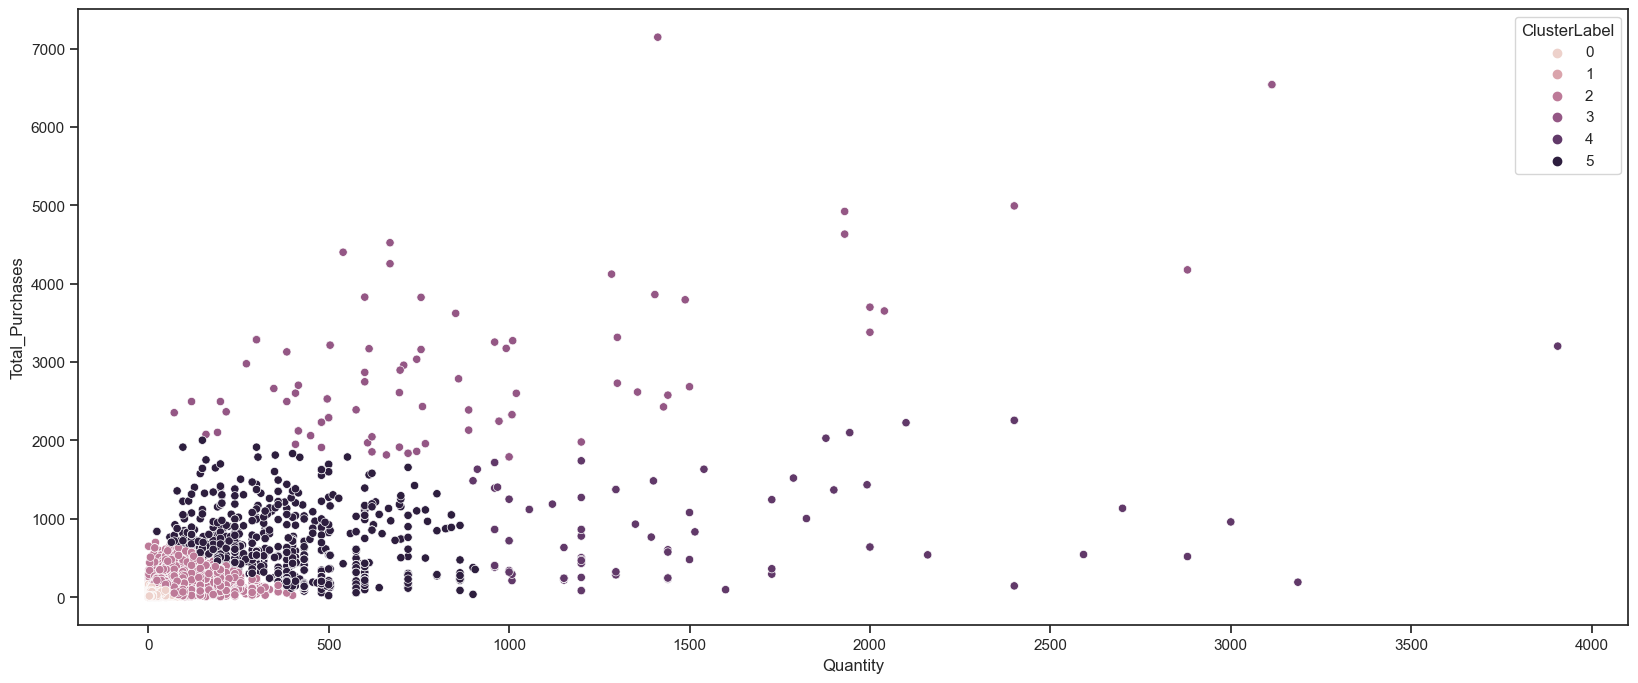

In [34]:
plt.figure(figsize = (20,8))
sns.scatterplot(x='Quantity', y='Total_Purchases', data=df, hue='ClusterLabel')
plt.show()


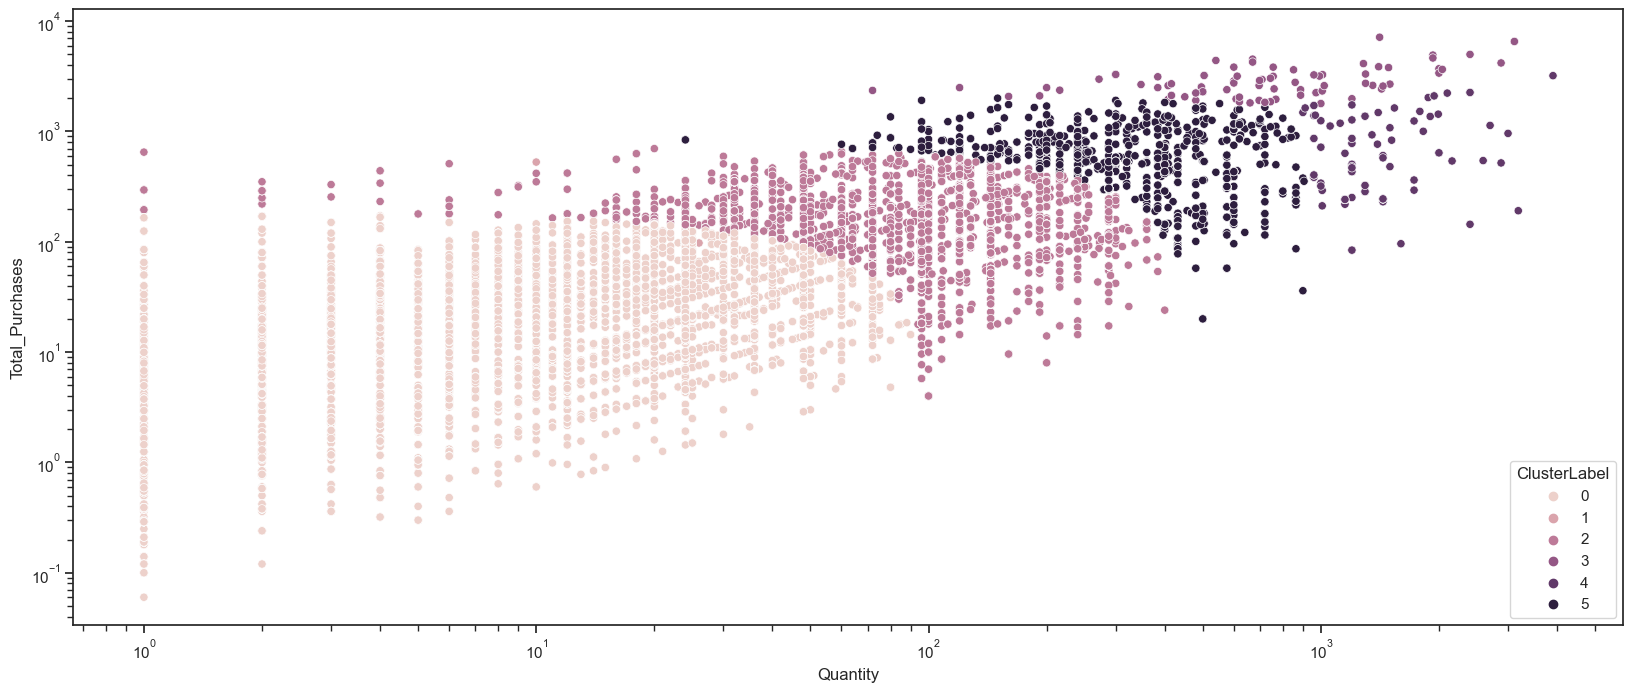

In [35]:
plt.figure(figsize = (20,8))
sns.scatterplot(x='Quantity', y='Total_Purchases', data=df, hue='ClusterLabel')
plt.yscale('log')
plt.xscale('log')
plt.show()


In [36]:
df

,InvoiceNo,InvoiceDate,CustomerID,Country,Description,Quantity,UnitPrice,Total_Purchases,Customer_Life gg,Product_Type,ClusterLabel
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,1.0,Low Price Product,0
1,536365,2010-12-01 08:26:00,17850.0,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,1.0,Low Price Product,0
2,536365,2010-12-01 08:26:00,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,1.0,Low Price Product,0
3,536365,2010-12-01 08:26:00,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,1.0,Low Price Product,0
4,536365,2010-12-01 08:26:00,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,1.0,Low Price Product,0
...,...,...,...,...,...,...,...,...,...,...,...
530099,581587,2011-12-09 12:50:00,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,1.0,Low Price Product,0
530100,581587,2011-12-09 12:50:00,12680.0,France,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,1.0,Low Price Product,0
530101,581587,2011-12-09 12:50:00,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,1.0,Low Price Product,0
530102,581587,2011-12-09 12:50:00,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,1.0,Low Price Product,0


In [37]:
def clusters(df):
    # Performed 4 aggregations grouped on column: 'ClusterLabel'
    df_cluster = df.groupby(['ClusterLabel','Product_Type']).agg(ClusterLabel_count=('ClusterLabel', 'count'), Quantity_mean=('Quantity', 'mean'), Total_Purchases_mean=('Total_Purchases', 'mean'), Customer_Life_gg_mean=('Customer_Life gg', 'mean')).reset_index()
    # Sort by column: 'ClusterLabel_count' (descending)
    df_cluster = df_cluster.sort_values(['ClusterLabel'])
    # Change column type to int64 for columns: 'Quantity_mean', 'Total_Purchases_mean', 'Customer_Lifegg_mean'
    df_cluster = df_cluster.astype({'Quantity_mean': 'int64', 'Total_Purchases_mean': 'int64', 'Customer_Life_gg_mean': 'int64'})
    return df_cluster

df_cluster = clusters(df.copy())
df_cluster

,ClusterLabel,Product_Type,ClusterLabel_count,Quantity_mean,Total_Purchases_mean,Customer_Life_gg_mean
0,0,High Price Product,21,1,165,1
1,0,Low Price Product,373084,8,14,1
2,0,Low/Medium Price Product,8878,2,30,1
3,0,Medium Price Product,75,1,103,1
4,1,Low Price Product,1043,9,18,269
5,1,Low/Medium Price Product,23,2,40,280
6,1,Medium Price Product,1,10,527,264
7,2,High Price Product,20,1,265,1
8,2,Low Price Product,11321,101,149,1
9,2,Low/Medium Price Product,435,20,252,1


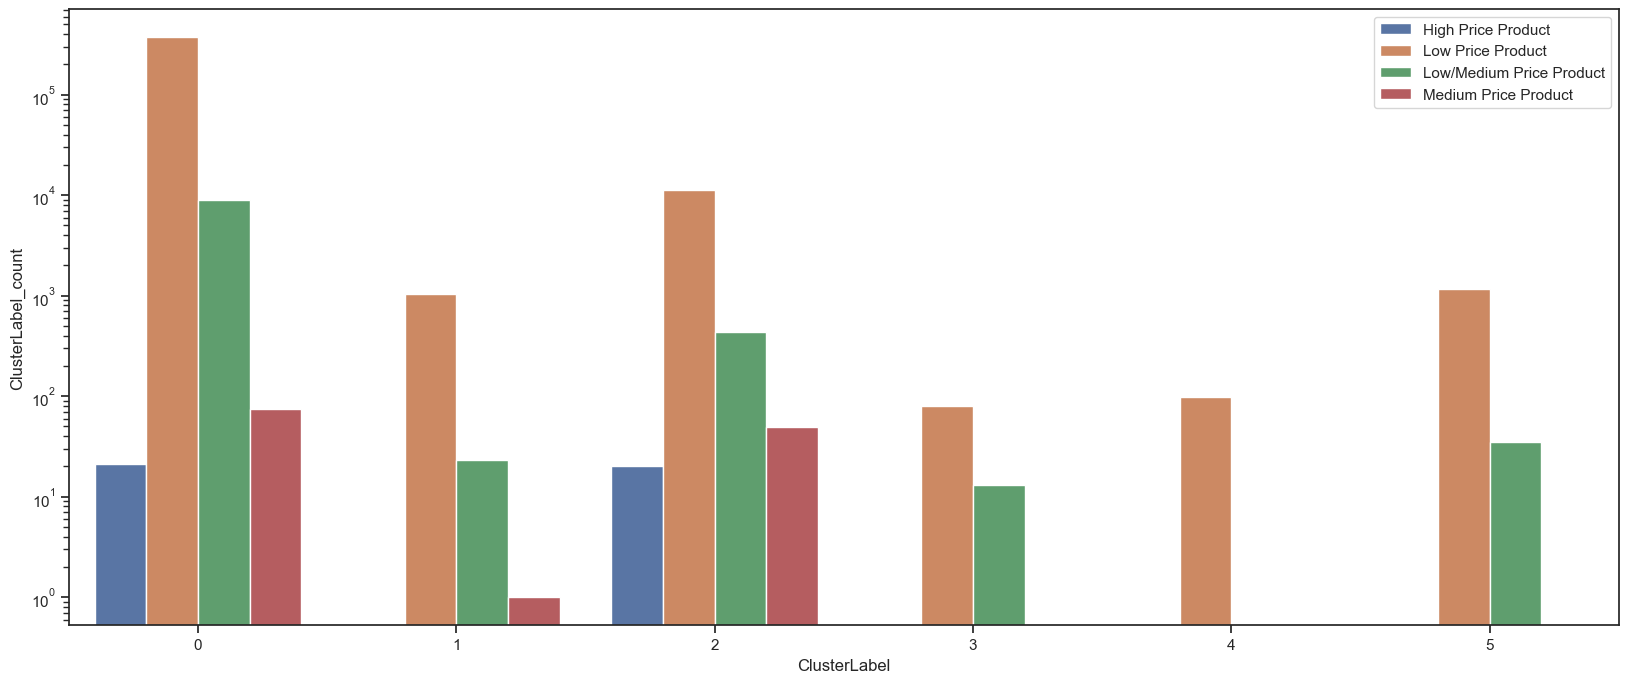

In [39]:
plt.figure(figsize = (20,8))
sns.barplot(x='ClusterLabel', y='ClusterLabel_count', data=df_cluster, hue='Product_Type')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

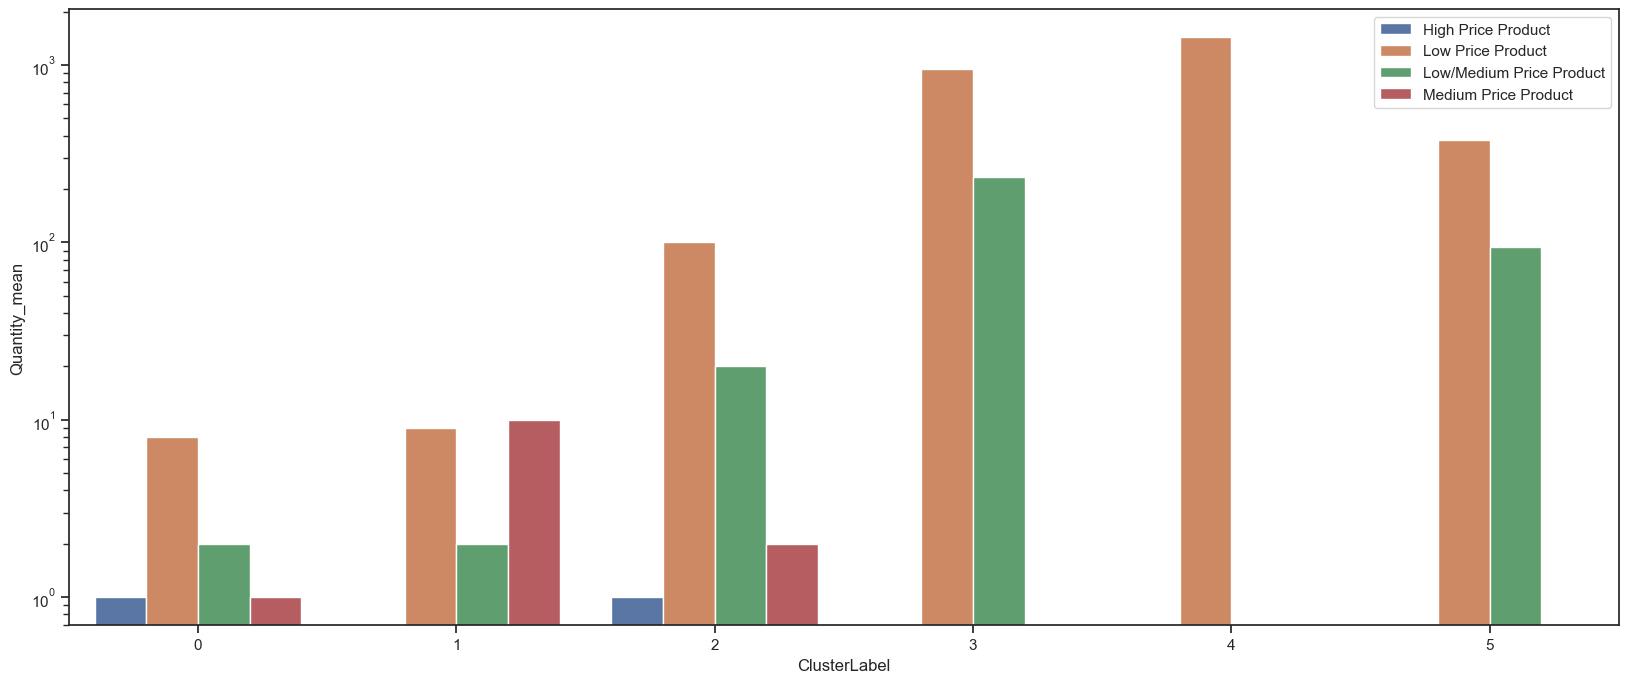

In [43]:
plt.figure(figsize = (20,8))
sns.barplot(x='ClusterLabel', y='Quantity_mean', data=df_cluster, hue='Product_Type')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

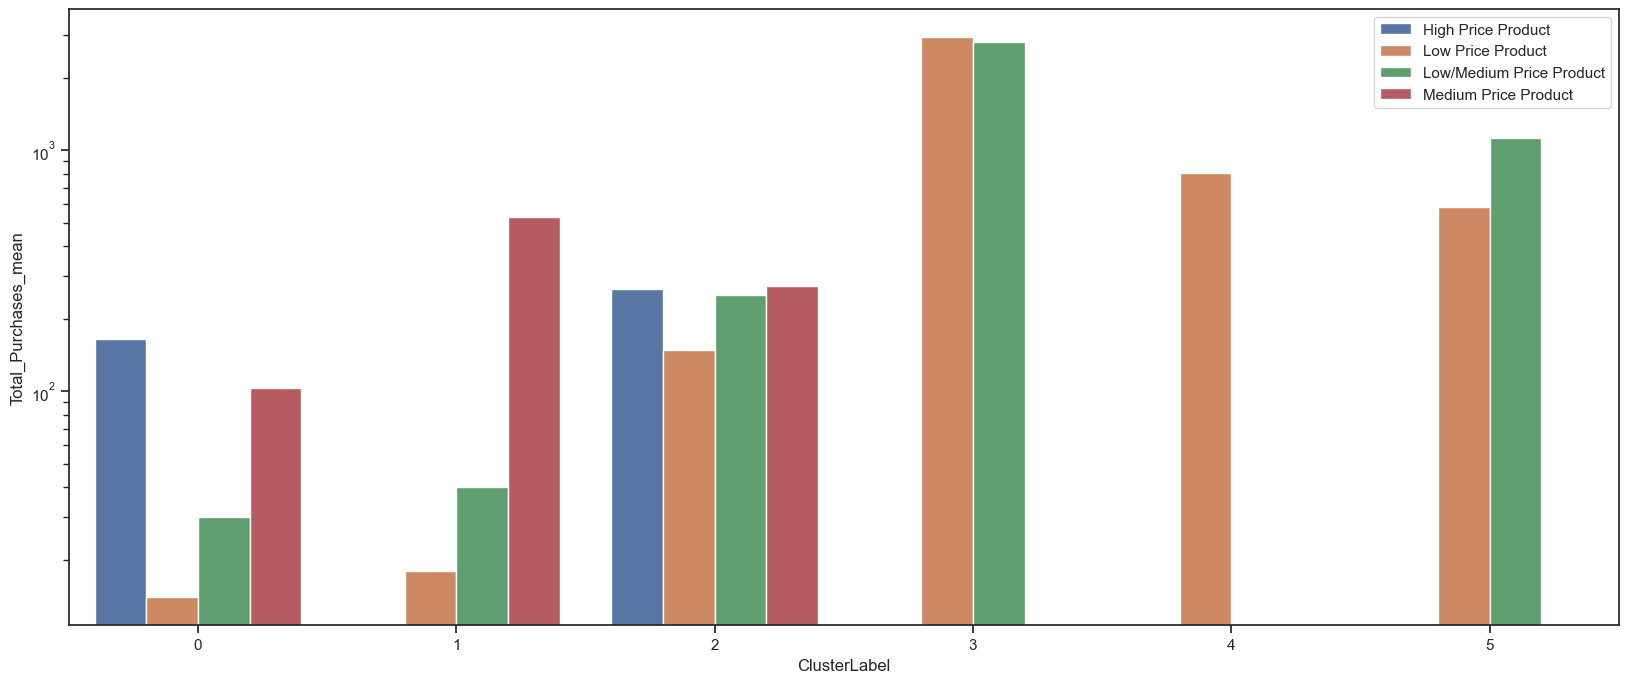

In [44]:
plt.figure(figsize = (20,8))
sns.barplot(x='ClusterLabel', y='Total_Purchases_mean', data=df_cluster, hue='Product_Type')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

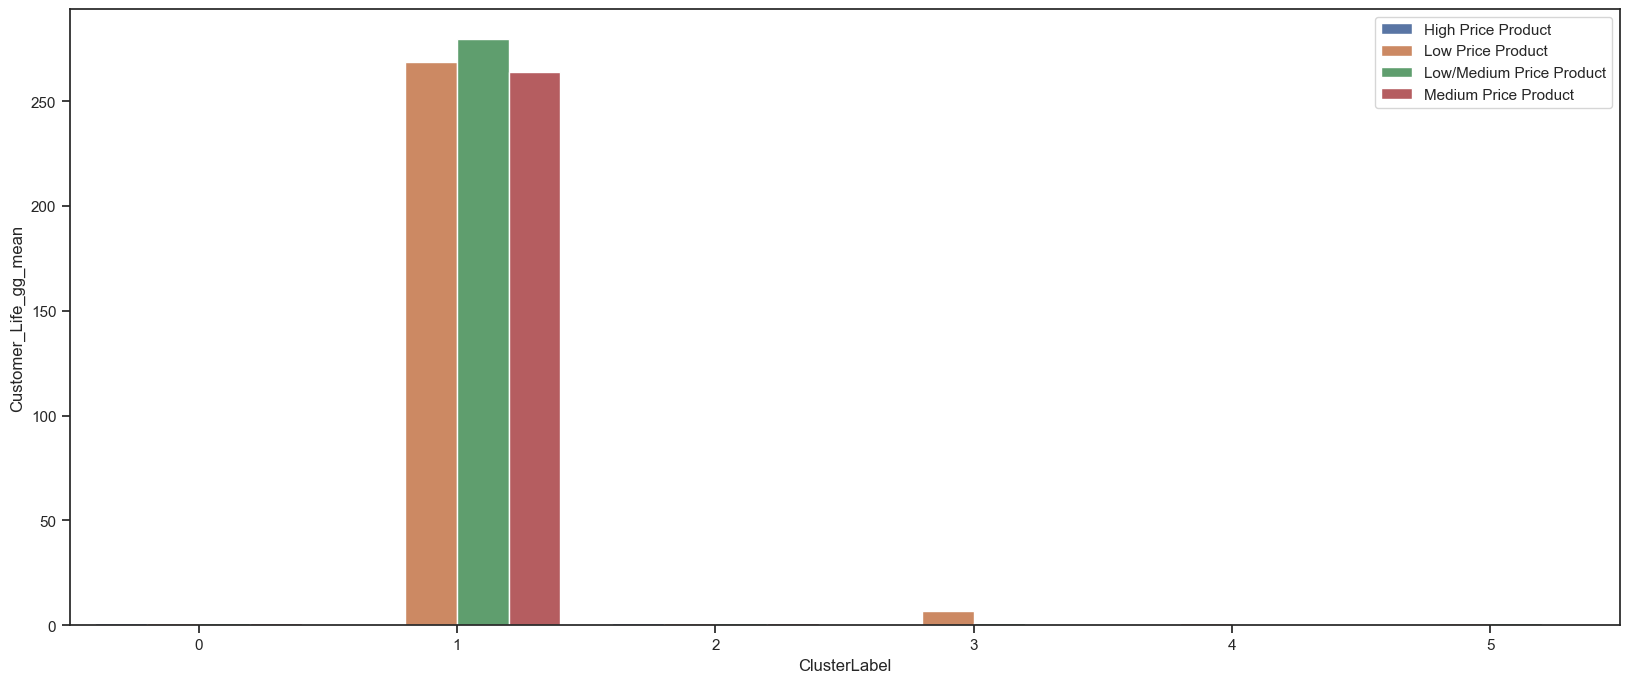

In [46]:
plt.figure(figsize = (20,8))
sns.barplot(x='ClusterLabel', y='Customer_Life_gg_mean', data=df_cluster, hue='Product_Type')
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()